In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import PIL.Image
import matplotlib.pyplot as plt


import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [ ]:
resnet50 =ResNet50( include_top=False, weights="imagenet", input_shape=IMAGE_SIZE+[3])

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet50.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/flower_photos/train/*')
folders

['/content/drive/MyDrive/flower_photos/train/sunflower',
 '/content/drive/MyDrive/flower_photos/train/daisy',
 '/content/drive/MyDrive/flower_photos/train/dandelion',
 '/content/drive/MyDrive/flower_photos/train/roses',
 '/content/drive/MyDrive/flower_photos/train/tulips']

In [ ]:
x = Flatten()(resnet50.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet50.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/flower_photos/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') 



Found 2800 images belonging to 5 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/flower_photos/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 880 images belonging to 5 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
88/88 [==============================] - 902s 10s/step - loss: 6.0825 - accuracy: 0.2559 - val_loss: 2.4566 - val_accuracy: 0.2670
Epoch 2/50
88/88 [==============================] - 43s 486ms/step - loss: 1.6900 - accuracy: 0.3846 - val_loss: 1.2606 - val_accuracy: 0.5011
Epoch 3/50
88/88 [==============================] - 42s 481ms/step - loss: 1.5156 - accuracy: 0.4580 - val_loss: 1.8013 - val_accuracy: 0.3295
Epoch 4/50
88/88 [==============================] - 43s 484ms/step - loss: 1.3669 - accuracy: 0.5026 - val_loss: 1.8777 - val_accuracy: 0.4739
Epoch 5/50
88/88 [==============================] - 43s 483ms/step - loss: 1.5552 - accuracy: 0.4758 - val_loss: 1.7542 - val_accuracy: 0.3773
Epoch 6/50
88/88 [==============================] - 43s 484ms/step - loss: 1.5759 - accuracy: 0.4654 - val_loss: 1.4819 - val_accuracy: 0.4716
Epoch 7/50
88/88 [==============================] - 42s 481ms/step - loss: 1.4006 - accuracy: 0.5244 - val_loss: 1.5505 - val_accuracy: 0.5045


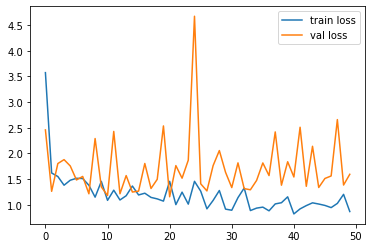

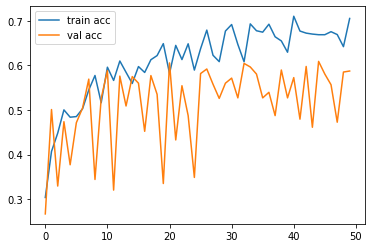

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [1]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('flower_predict_vgg19.h5')

NameError: ignored

In [3]:
from tensorflow.keras.models import load_model
model1 = load_model('flower_predict_vgg19.h5')

OSError: ignored